# Multinomial Logistic Regression

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Data

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

### Normalization/ Standardization

In [3]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split Train and Test & Addition of Intercept

In [4]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept
# print(y.shape)

### Modify y

In [22]:
# y (n, k)
#The values in the matrix will be 0 or 1. For instance the rows 
#where we have output 2 the column 2 will contain 1 and rest all 0.
#in simple words, y will be of shape (m, k)
#no. of class  (can also use np.unique)
k = len(set(y))
print(k)

m = X_train.shape[0]  #no.of samples
n = X_train.shape[1]  #no. of features

#First make 0s
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    # if y_train == that class name, then change to 1
    cond = y_train==each_class
    # row, where condition is met = the nth row of y,each_class indicates the column, eg class =  1 then column 1
    #collect row index where condition is met
    y_train_encoded[np.where(cond), each_class] = 1

y_test_encoded = np.zeros((X_test.shape[0],k))
for each_class in range(k):
    # if y_train == that class name, then change to 1
    cond = y_test==each_class
    # row, where condition is met = the nth row of y,each_class indicates the column, eg class =  1 then column 1
    #collect row index where condition is met
    y_test_encoded [np.where(cond), each_class] = 1
    
# print(y_train_encoded)

3


#### Plot:  Visualize our data

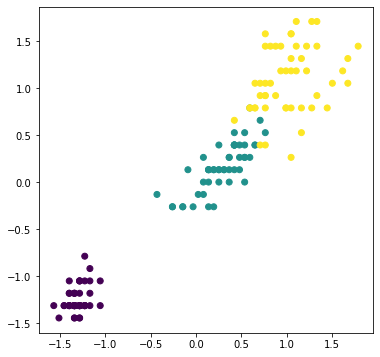

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
# plt.legend()
plt.show()

### Initializing Theta

In [7]:
# Initializing theta
# k = len(set(y)) 

# m = X_train.shape[0]  #no.of samples
# n = X_train.shape[1]  #no. of features

theta_initial = np.random.rand(n, k)
print(theta_initial)

[[0.17934835 0.38512705 0.03728981]
 [0.72068125 0.74916818 0.85591554]
 [0.58603467 0.04695144 0.0442977 ]]


### Gradient Descent Batch

In [8]:
import numpy as np
from sklearn.metrics import average_precision_score, classification_report
# from sklearn.preprocessing import StandardScaler

#for those who tend to feel overwhelmed with lots of code
#I recommend you to write each part of the code separately as function
#it helps!
def gradient(X, y, theta):
    m = X.shape[0]
    h = h_theta(X, theta)
    cost = -np.sum(y*np.log(h))/m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        

def h_theta(X, theta):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
#     print("X@w: ", (X @ w)[:5])
#     print("Softmax: ", softmax(X @ w)[:5])
    return softmax(X @ theta)

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

def logistic_regression_GD(X_train, y_train,X_test,y_test,theta_initial, k, n,alpha, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    theta = theta_initial
    tol = 0.0001
    loss_history_train = []
    loss_history_test = []
    cost_train_old = np.inf
    iter_stop = 0
    for i in range(max_iter):
#         loss_new_train = get_loss(X_train,y_train,theta)
#         los_test = get_loss(X_test,y_test,theta)
        
        cost_train_new, grad_train =  gradient(X_train, y_train, theta)
        cost_test,_ = gradient(X_test,y_test,theta)
        if delta_loss(cost_train_new, cost_train_old,tol):
            diff = np.abs(cost_train_new - cost_train_old)
            iter_stop = i
            print("stop at ",iter_stop)
            break
        cost_train_old = cost_train_new
        
        if i % 100 == 0:
            print(f"Cost at iteration {i}", cost_train_old)
        loss_history_train.append(cost_train_old)
        loss_history_test.append(cost_test)
        
        theta = theta - alpha * grad_train
        
    return loss_history_train,loss_history_test, theta, iter_stop,diff

# pred = np.argmax(h_theta(X_test, w), axis=1)

# print("Report: ", classification_report(y_test, pred))

In [18]:
import numpy as np
from sklearn.metrics import average_precision_score, classification_report
# from sklearn.preprocessing import StandardScaler

#for those who tend to feel overwhelmed with lots of code
#I recommend you to write each part of the code separately as function
#it helps!
def gradient(X, y, theta):
    m = X.shape[0]
    h = h_theta(X, theta)
    cost = -np.sum(y*np.log(h))/m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, theta):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
#     print("X@w: ", (X @ w)[:5])
#     print("Softmax: ", softmax(X @ w)[:5])
    return softmax(X @ theta)

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

def logistic_regression_GD_mini(X_train, y_train,X_test,y_test,theta_initial, k, n,alpha, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    theta = theta_initial
    tol = 0.0001
    loss_history_train = []
    loss_history_test = []
    cost_train_old = np.inf
    iter_stop = 0
    batch_train = int(0.1*X_train.shape[0])
    batch_test = int(0.1*X_test.shape[0])  
    # Random index
    idx = np.random.randint(X_train.shape[0])
    idx_test = np.random.randint(X_test.shape[0])    
    for i in range(max_iter):
        X_train_batch = X_train[idx:idx+batch_train]
#         print(X_train_batch.shape)
        y_train_batch = y_train[idx:idx+batch_train]
        X_test_batch = X_test[idx_test:idx_test+batch_test]
        y_test_batch = y_test[idx_test:idx_test+batch_test]          

        cost_train_new, grad_train =  gradient(X_train_batch, y_train_batch, theta)
        cost_test,_ = gradient(X_test_batch,y_test_batch,theta)
        if delta_loss(cost_train_new, cost_train_old,tol):
            diff = np.abs(cost_train_new - cost_train_old)
            iter_stop = i
            print("stop at ",iter_stop)
            break
        cost_train_old = cost_train_new
        
        if i % 100 == 0:
            print(f"Cost at iteration {i}", cost_train_old)
        loss_history_train.append(cost_train_old)
        loss_history_test.append(cost_test)
        
        theta = theta - alpha * grad_train
        
    return loss_history_train,loss_history_test, theta, iter_stop,diff

# pred = np.argmax(h_theta(X_test, w), axis=1)

# print("Report: ", classification_report(y_test, pred))

In [19]:
alpha = 0.01
cost_history_train,cost_history_test, theta, iter_stop,diff = logistic_regression_GD(X_train, y_train_encoded,X_test,y_test_encoded,theta_initial, k, n = X_train.shape[1], alpha = alpha,  max_iter=5000)


Cost at iteration 0 1.300897737918133
Cost at iteration 100 0.12442055232020553
Cost at iteration 200 0.09464216073850015
stop at  284


In [21]:
alpha_mini = 0.01
cost_history_train_mini,cost_history_test_mini, theta_mini, iter_stop_mini,diff_mini = logistic_regression_GD_mini(X_train, y_train_encoded,X_test,y_test_encoded,theta_initial, k, n = X_train.shape[1], alpha = alpha_mini,  max_iter=5000)
# print(theta_mini)

Cost at iteration 0 1.359628688075733
Cost at iteration 100 0.46677816796324695
Cost at iteration 200 0.35278181108377477
Cost at iteration 300 0.2840236435381507
Cost at iteration 400 0.23581857521140007
Cost at iteration 500 0.2002756815007433
Cost at iteration 600 0.17319675195719153
Cost at iteration 700 0.15202511110969033
Cost at iteration 800 0.13510907342170905
Cost at iteration 900 0.12134005137179917
Cost at iteration 1000 0.10995128890261228
stop at  1023
[[-0.84614142  1.63015653 -0.18224991]
 [-0.614056    0.30426696  2.635554  ]
 [-1.89168752  0.68334017  1.88563116]]


### Batch

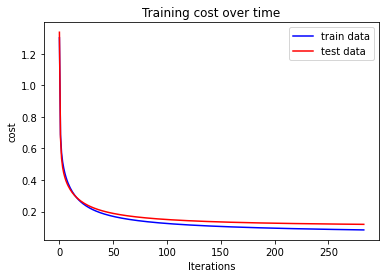

In [12]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train,'b', label="train data")
plt.plot(cost_history_test,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

### Mini

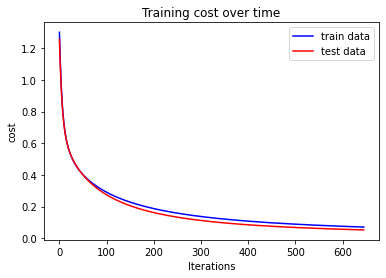

In [13]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train_mini,'b', label="train data")
plt.plot(cost_history_test_mini,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

### Accuracy

In [23]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_train_pred_soft = h_theta(X_train, theta)
y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)
y_test_pred_soft = h_theta(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

k = y_train_encoded.shape[1]

train_rsq_soft = r_squared(y_train_encoded, y_train_pred_soft)
train_rsq_hard = r_squared(y_train_encoded, y_train_pred_hard)
train_acc = (y_train_pred_hard == y_train_encoded.astype(int)).astype(int).sum() / (k*y_train_encoded.shape[0])
test_rsq_soft = r_squared(y_test_encoded, y_test_pred_soft)
test_rsq_hard = r_squared(y_test_encoded, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test_encoded.astype(int)).astype(int).sum() / (k*y_test_encoded.shape[0])

print('Got train set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (train_rsq_soft, train_rsq_hard, train_acc))
print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]
Got train set soft R^2 0.9394, hard R^2 0.8857, accura

### Plot

In [ ]:
# from sklearn.preprocessing import label_binarize
# print("=========Average precision score=======")
# y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
# yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

# for i in range(n_classes):
#     class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
#     print(f"Class {i} score: ", class_score)